In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as pex
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe().T
#df.dtypes

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
#df.info()
df.shape

(20640, 10)

In [10]:
# replacing all missing data in total_bedrooms with mean, all are numerical columns except ocean_proximity[categorical data]
#df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

<AxesSubplot:>

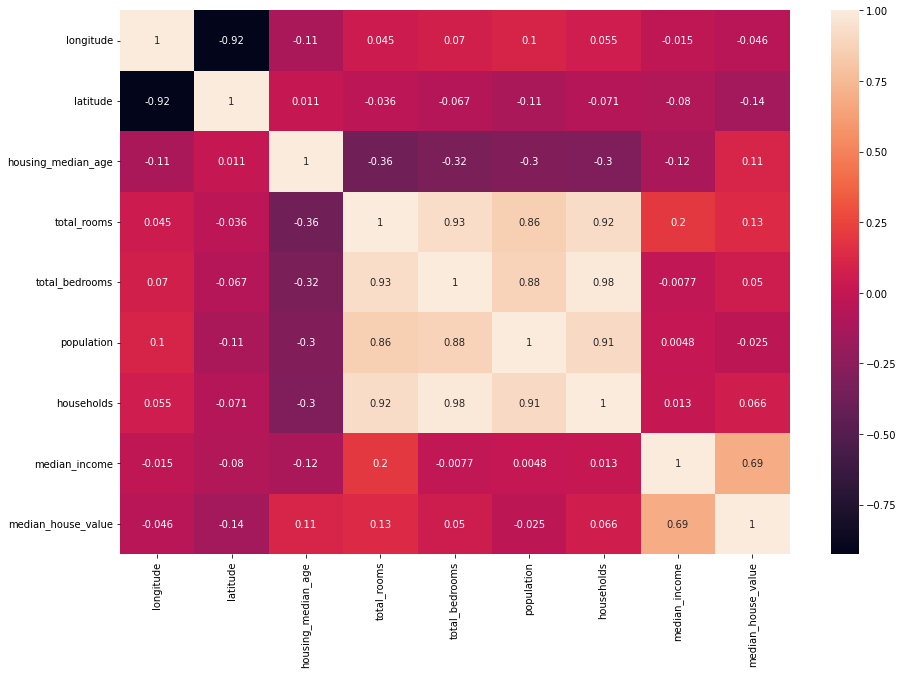

In [3]:
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,ax=ax)

- longtitude and latitude has no relation with each other
- meadian_income and median_house_value have good relatable relation with each other
- Total_bedrooms have some missing values and is somewhat relatable to households,total_rooms
- similarly with population with households,total_rooms.

In [4]:
bedroom_median_value = df['total_bedrooms'].median()
bedroom_median_value

435.0

In [5]:
df['total_bedrooms'].fillna(bedroom_median_value,inplace=True)

In [6]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<AxesSubplot:>

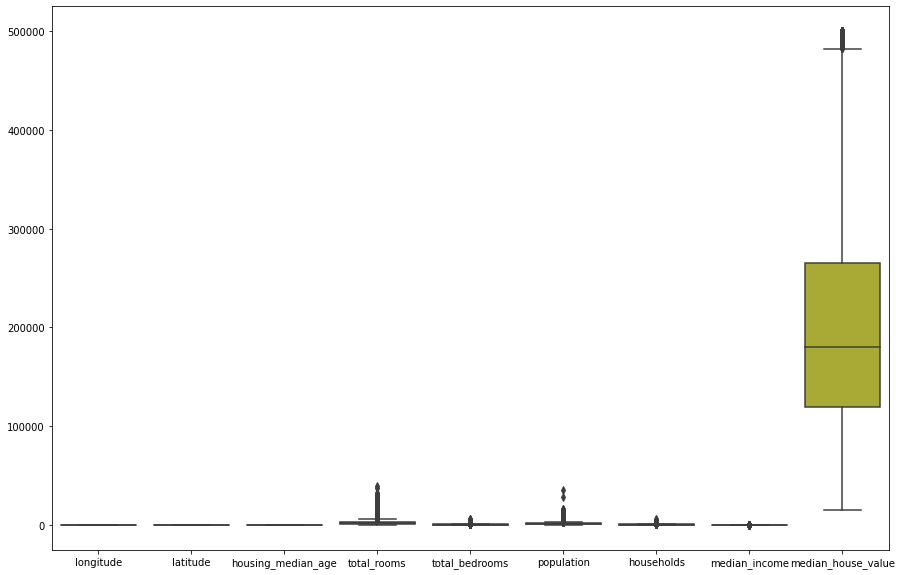

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
# there are outliers in  total_rooms,total_bedrooms,populations,median income.But we have to avoid two columns .

In [8]:
x = df.copy()

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

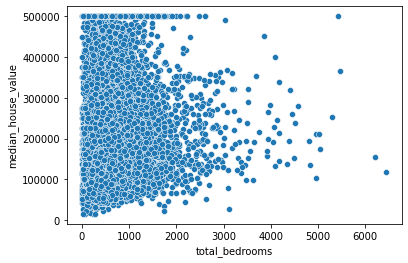

In [9]:
sns.scatterplot(x = x['total_bedrooms'],y=x['median_house_value'])

In [10]:
x[x['total_bedrooms']>=2800].shape

(90, 10)

In [13]:

x = x[x['total_bedrooms']<2800]
x.shape


(20550, 10)

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

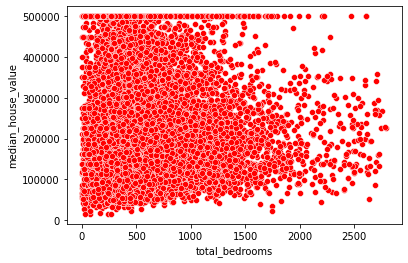

In [14]:
sns.scatterplot(x=x['total_bedrooms'],y=x['median_house_value'],color = 'red')

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

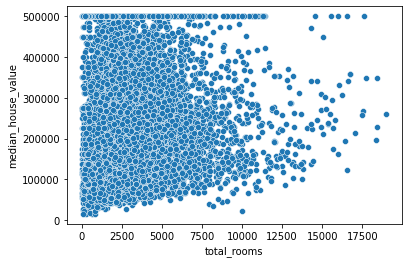

In [15]:
sns.scatterplot(x=x['total_rooms'],y=x['median_house_value'])